In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

# for warning related stuff
import warnings
warnings.filterwarnings("ignore")

In [21]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)
# we need to ignore the y value 

In [22]:
X.shape

(1000, 2)

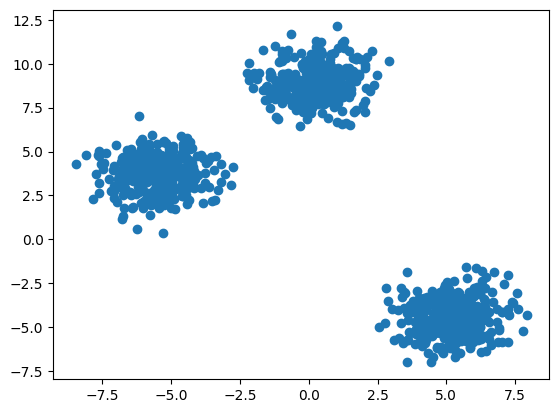

In [23]:
plt.scatter(X[:,0], X[:,1])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#here we set the testing size as 33% of the data

In [25]:
from sklearn.cluster import KMeans

In [26]:
## Manual Process for finding the number of cluster
# Elbow method to select the k value
wcss = []
for k in range(1, 11):
    # at first comparision is done with k value and then with k means ++
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [27]:
wcss 
# after this we will get the value for each k   and the value is in decreasing order

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.467788465513,
 991.9047984051341,
 853.4944703359785,
 754.5881827034416,
 665.7412891334809,
 578.1181771884528,
 531.3846583938487]

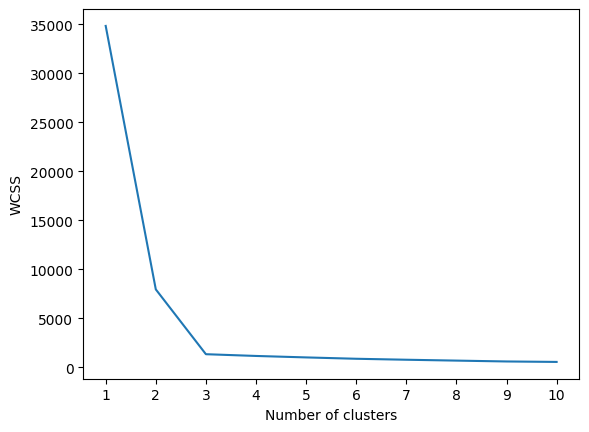

In [28]:
# creating and plotting the elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## From this plot what we can define or identify is the value of k 

In [29]:
#for cluster
kmeans = KMeans(n_clusters= 3 , init="k-means++")

In [30]:
# applying for training and testing data 



# fitting the data 
y_labels = kmeans.fit_predict(X_train)

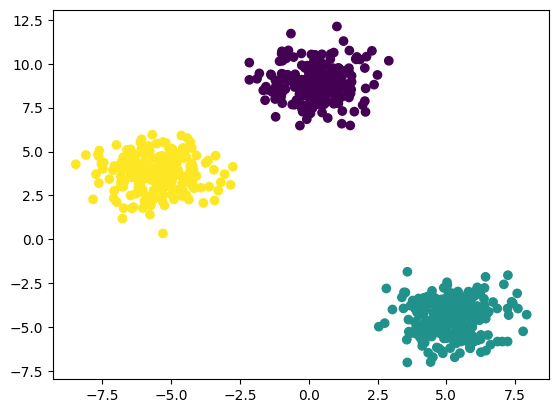

In [31]:
# scatter plot for train data 
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)


In [32]:
# for testing data 
y_test_label = kmeans.predict(X_test)

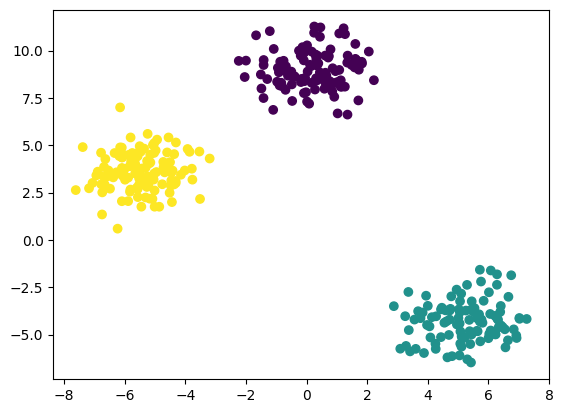

In [33]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_label)

In [34]:
## Automating all this process 
# knee locator
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss,curve='convex', direction='decreasing')
kl.elbow


3

In [35]:
# for performance metrics
## Silhoutte score
# silhoutte score value ranges from -1 to +1
from sklearn.metrics import  silhouette_score

In [36]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)


In [37]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49137731762633263,
 0.33694328451957456,
 0.3276248524093358,
 0.3454444359789495,
 0.34492205076157256,
 0.34065968584695566]

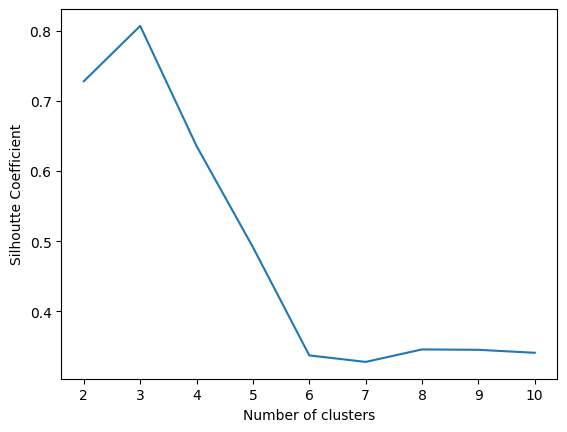

In [39]:
# Plotting the chart
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show()
# Silhoutte score range from -1 to +1 